In [0]:
import pandas as pd
import numpy as np

In [0]:
!wget http://iali.in/datasets/mushrooms.csv

--2020-06-04 06:34:52--  http://iali.in/datasets/mushrooms.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374003 (365K) [text/plain]
Saving to: ‘mushrooms.csv.1’

mushrooms.csv.1     100%[===================>] 365.24K   405KB/s    in 0.9s    

2020-06-04 06:34:53 (405 KB/s) - ‘mushrooms.csv.1’ saved [374003/374003]



In [0]:
dataset = pd.read_csv('http://iali.in/datasets/mushrooms.csv')

In [0]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


**Label Encoding :**

In [0]:
from sklearn import preprocessing 

labelencoder = preprocessing.LabelEncoder()
for col in dataset.columns:
    data[col] = labelencoder.fit_transform(dataset[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [0]:
x = data.iloc[:, data.columns != 'class'].values
y = data.iloc[:,0].values

In [0]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)


In [0]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

1.0

In [0]:
from sklearn.metrics import classification_report

classes = ['0','1']

classification_report(y_test,y_pred,target_names=classes)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       837\n           1       1.00      1.00      1.00       788\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1620,1,1
1621,1,1
1622,1,1
1623,1,1


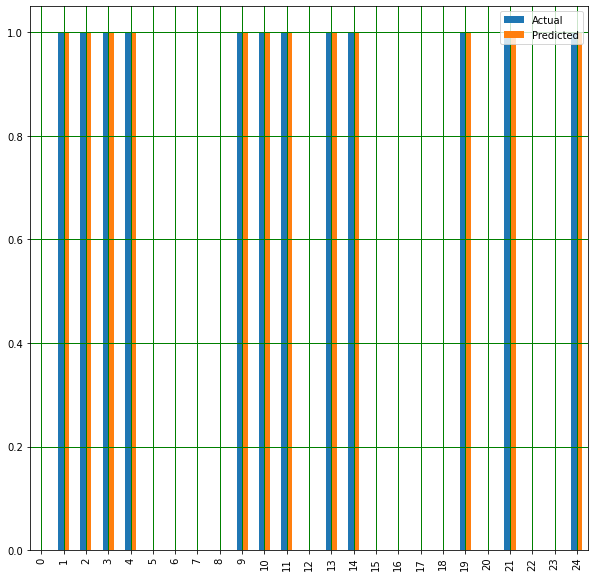

In [0]:
import matplotlib.pyplot as plt

df1 = df.head(25)
df1.plot(kind ='bar', figsize=(10,10))

plt.grid(which='major', linestyle='-', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

**Keras BoG :**

In [0]:
from keras.preprocessing.text import Tokenizer


## Step 1: Determine the Vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset)
print(f'Vocabulary: {list(tokenizer.word_index.keys())}')

## Step 2: Count
vectors = tokenizer.texts_to_matrix(dataset, mode='count')
print(vectors)

Vocabulary: ['color', 'stalk', 'ring', 'gill', 'cap', 'surface', 'shape', 'above', 'below', 'veil', 'type', 'class', 'bruises', 'odor', 'attachment', 'spacing', 'size', 'root', 'number', 'spore', 'print', 'population', 'habitat']
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 

**Min Max Scalar :**

In [0]:
x = data.iloc[:, 1:3].values
x

array([[5, 2],
       [5, 2],
       [0, 2],
       ...,
       [2, 2],
       [3, 3],
       [5, 2]])

In [0]:
from sklearn import preprocessing 
 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
  
print ("After min max Scaling : \n", x_after_min_max_scaler) 


After min max Scaling : 
 [[1.         0.66666667]
 [1.         0.66666667]
 [0.         0.66666667]
 ...
 [0.4        0.66666667]
 [0.6        1.        ]
 [1.         0.66666667]]


**Standardization :**

In [0]:
Standardisation = preprocessing.StandardScaler() 
  
# Scaled feature 
x_after_Standardisation = Standardisation.fit_transform(x) 
  
print ("\nAfter Standardisation : \n", x_after_Standardisation) 


After Standardisation : 
 [[ 1.02971224  0.14012794]
 [ 1.02971224  0.14012794]
 [-2.08704716  0.14012794]
 ...
 [-0.8403434   0.14012794]
 [-0.21699152  0.95327039]
 [ 1.02971224  0.14012794]]


**Random Forest Regression :**

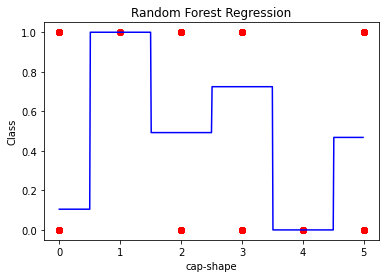

In [0]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

y_pred = regressor.predict(X)

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('cap-shape')
plt.ylabel('Class')
plt.show()

**Linear Regression :**

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

for i in range(0,len(data.columns)):
    print(x_test[i],"  ",y_pred[i],"  ",y_test[i])

[5 2 4 0 5 1 1 0 3 1 3 2 0 7 7 0 2 1 0 2 0 1]    0.48425105652112377    1
[5 3 9 0 2 1 0 0 7 0 1 1 1 0 6 0 2 1 2 1 4 1]    0.41956427622625714    0
[5 2 2 0 2 1 0 1 0 1 0 1 1 7 7 0 2 1 0 7 4 2]    0.44170274222158024    0
[5 3 2 0 2 1 0 1 0 1 0 1 1 6 6 0 2 1 0 7 4 4]    0.42080110426277084    0
[3 3 4 0 2 1 0 1 0 1 0 2 2 6 6 0 2 1 0 7 4 4]    0.4415481115840857    0
[ 2  3  3  1  5  1  0  0 10  1  1  2  2  6  7  0  2  1  4  2  5  0]    0.48246536929128114    0
[ 5  3  4  1  5  1  0  0 10  1  1  2  2  7  6  0  2  1  4  2  5  0]    0.48778656140872056    1
[2 3 4 1 5 1 0 0 7 1 1 2 2 6 3 0 2 1 4 2 4 0]    0.4963900970801247    1
[ 0  3  8  1  3  1  0  0 10  0  2  2  2  7  7  0  2  1  4  2  2  3]    0.48949306117085173    0
[ 5  3  8  1  6  1  0  1 10  0  3  2  2  7  7  0  2  1  4  3  4  1]    0.4906441446753692    1
[5 2 4 0 8 1 0 1 0 1 0 2 2 6 7 0 2 1 0 7 4 2]    0.48985552055638776    0
[2 2 8 1 2 1 0 0 7 1 1 2 2 7 7 0 2 1 4 1 3 5]    0.48119438723660013    0
[ 3  2  4  0  5  0  0  0 11